In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [53]:
df = pd.read_csv("C:/Users/victus/Documents/data.project/week-7/ınstagram data.csv", encoding='latin-1')

In [54]:
df.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [56]:
df["Likes"].value_counts()

Likes
114    5
151    5
72     3
92     3
159    3
      ..
149    1
132    1
115    1
195    1
443    1
Name: count, Length: 85, dtype: int64

array([[<Axes: title={'center': 'Comments'}>]], dtype=object)

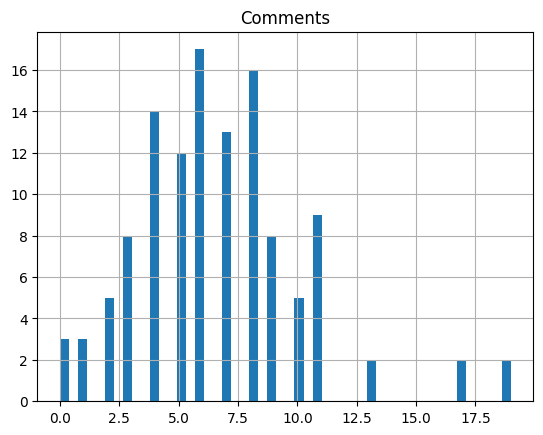

In [57]:
df.hist(column="Comments", bins=50)

<Axes: xlabel='From Home', ylabel='Comments'>

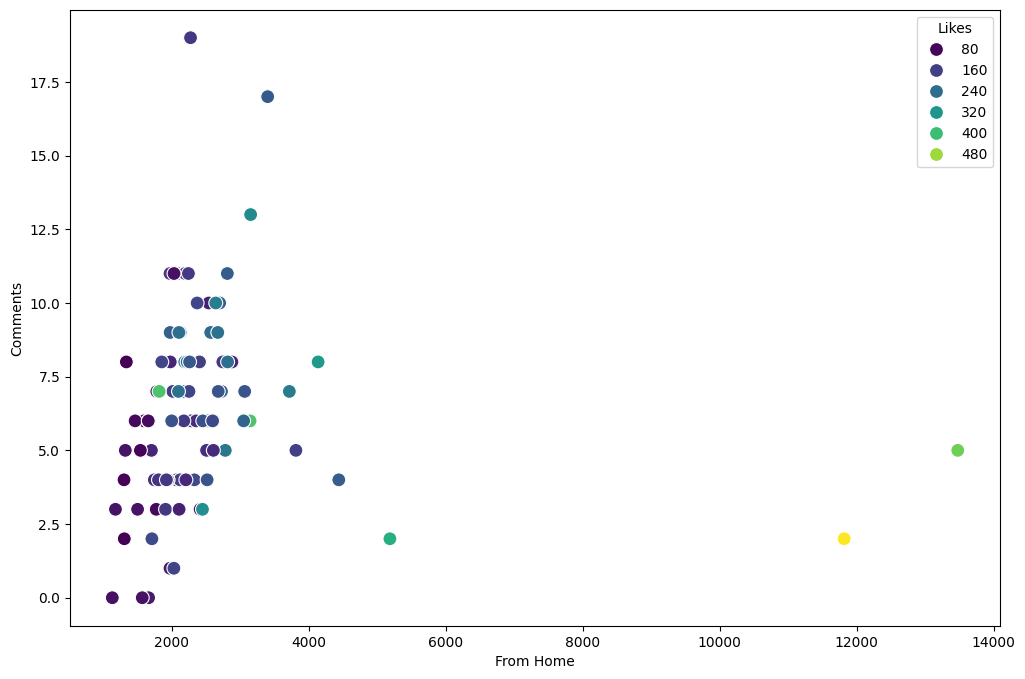

In [58]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='From Home', y='Comments', hue='Likes', data=df, palette='viridis', s=100)

In [59]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [60]:
numeric_columns = ['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']

# 'Caption' ve 'Hashtags' sütunlarını koru
selected_columns = ['Caption', 'Hashtags'] + numeric_columns

# Seçilen sütunları içeren yeni bir DataFrame oluştur
selected_df = df[selected_columns]

# Sayısal sütunları normalize et
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(selected_df[numeric_columns])


In [61]:
df[0:3]

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


In [62]:
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# 'Caption' ve 'Hashtags' sütunlarını ekleyin
normalized_df[['Caption', 'Hashtags']] = df[['Caption', 'Hashtags']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df[numeric_columns], normalized_df['Caption'], test_size=0.2, random_state=42)

# Sınıflandırma modelini eğit
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred = model.predict(X_test)

# Accuracy'yi hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.041666666666666664


In [65]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (95, 10) (95,)
Test set: (24, 10) (24,)


In [66]:
k = 4

neighbours = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [67]:
neighbours

KNeighborsClassifier(n_neighbors=4)

In [68]:
from sklearn import metrics
Ks = 5

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    neighbours = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neighbours.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [69]:
mean_acc

array([0.375     , 0.125     , 0.04166667, 0.04166667])

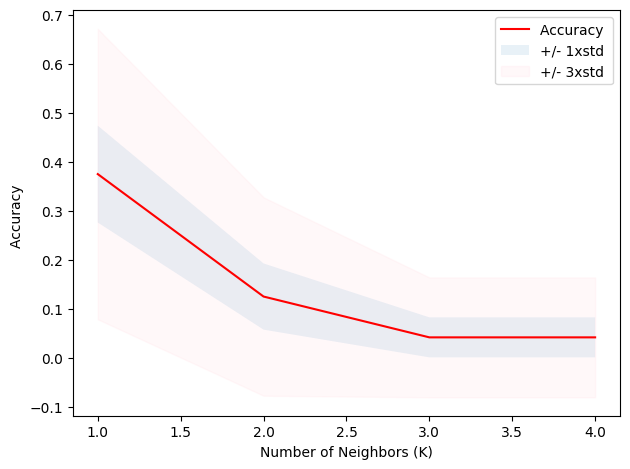

In [70]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="pink")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [2]:
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
X = df[['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits']]
y = df['Follows']  

# Veri setini eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sınıflandırma modeli oluşturun (örnek olarak RandomForestClassifier kullanılıyor)
model = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Precision ve Recall değerlerini hesaplayın
precision = precision_score(y_test, y_pred, average='micro') 
recall = recall_score(y_test, y_pred, average='micro')

print(f"Precison: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precison: 0.38
Recall: 0.38
